# Wildfire Learning
***
A springboard project based on [this Kaggle dataset of 1.88 million US wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires).

In [13]:
%matplotlib inline
import pandas as pd
import sqlite3
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations. The following core data elements were required for records to be included in this data publication: discovery date, final fire size, and a point location at least as precise as Public Land Survey System (PLSS) section (1-square mile grid). The data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG). Basic error-checking was performed and redundant records were identified and removed, to the degree possible. The resulting product, referred to as the Fire Program Analysis fire-occurrence database (FPA FOD), includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned during the 24-year period.

In [41]:
con = sqlite3.connect("./FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT * from fires", con)
con.close()

In [42]:
df_null = df.isnull()
df_null.sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

We see that the dataset contains a significant number of columns with null data. These columns are largely redundant though.

In [43]:
# Drop any and all columns that have missing values. Most of this data is unimportant anyway.
df.dropna(axis=1, inplace=True)
df.drop(['FOD_ID', 'FPA_ID', 'Shape'], axis=1, inplace=True)

In [44]:
df_null = df.isnull()
df_null.sum()

OBJECTID                      0
SOURCE_SYSTEM_TYPE            0
SOURCE_SYSTEM                 0
NWCG_REPORTING_AGENCY         0
NWCG_REPORTING_UNIT_ID        0
NWCG_REPORTING_UNIT_NAME      0
SOURCE_REPORTING_UNIT         0
SOURCE_REPORTING_UNIT_NAME    0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
dtype: int64

In [55]:
df.set_index('OBJECTID')

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
OBJECTID,,,,,,,,,,,,,,,,,,,
1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,2005,2453403.5,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,5.0,USFS,CA
2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453137.5,133,1.0,Lightning,0.25,A,38.933056,-120.404444,5.0,USFS,CA
3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453156.5,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA
4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.913333,5.0,USFS,CA
5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.933056,5.0,USFS,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880461,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,2015,2457291.5,269,13.0,Missing/Undefined,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA
1880462,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,2015,2457300.5,278,9.0,Miscellaneous,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA
1880463,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,2015,2457144.5,122,13.0,Missing/Undefined,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA


## Data wrangling

We're trying to learn more about how wildfires are clustered. If the cause of a particular fire can be determined from the features of that fire, relevant agencies may be able to more accurately implement preventative and/or ameliorative measures.

In [67]:
plt.rcParams['figure.figsize'] = [40, 10]

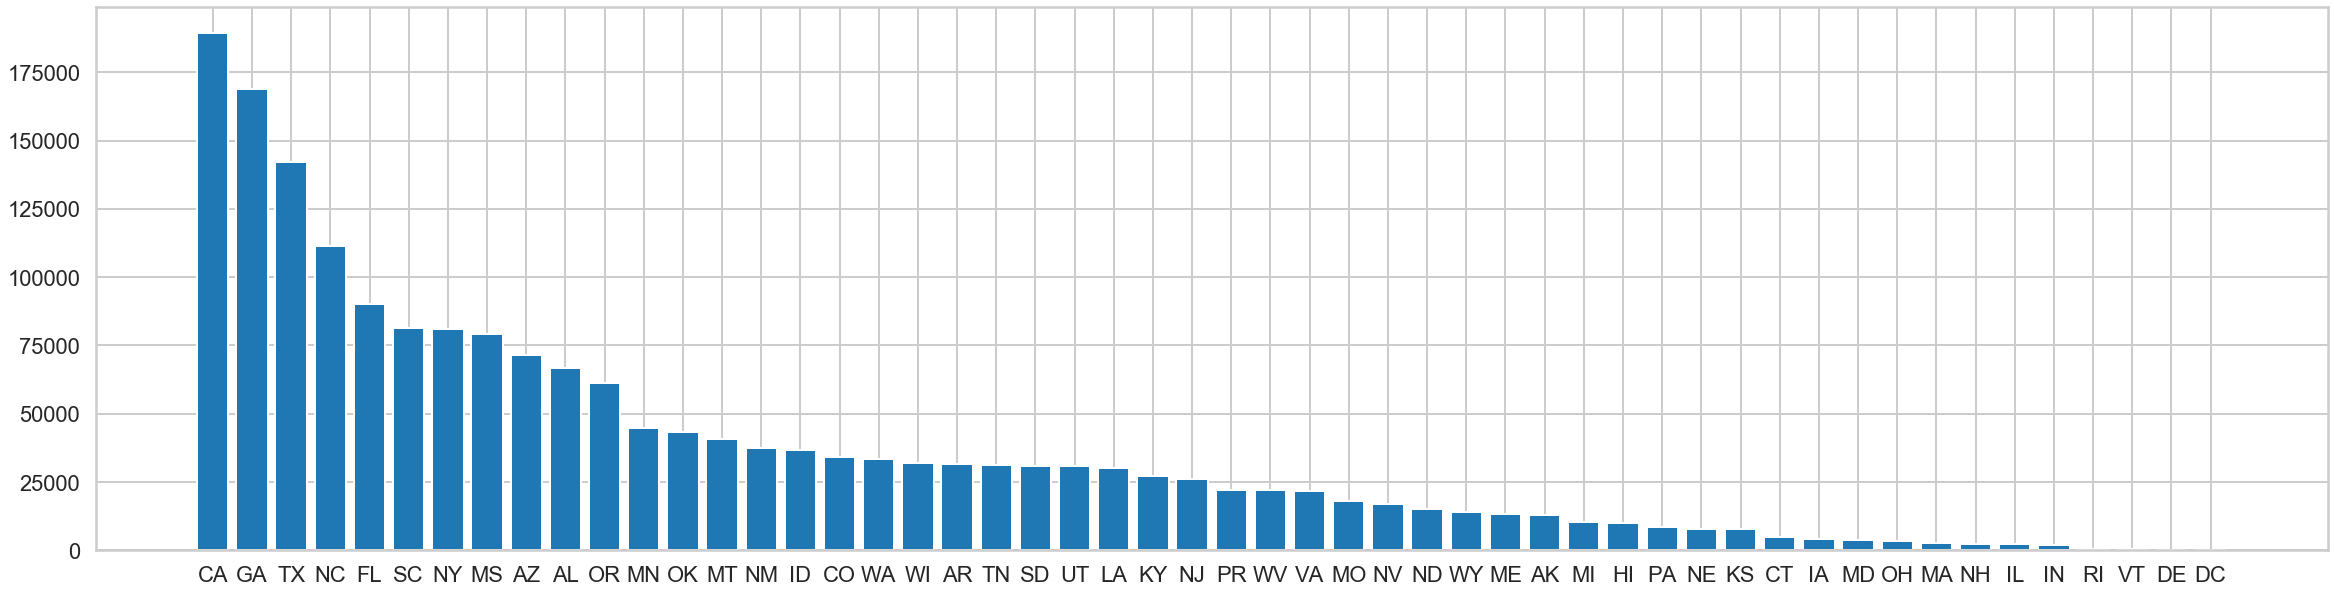

In [68]:
by_state = df.groupby('STATE')['OBJECTID'].count().sort_values(ascending=False)
X = by_state.index
Y = by_state.values
plt.bar(X, Y)
plt.show()

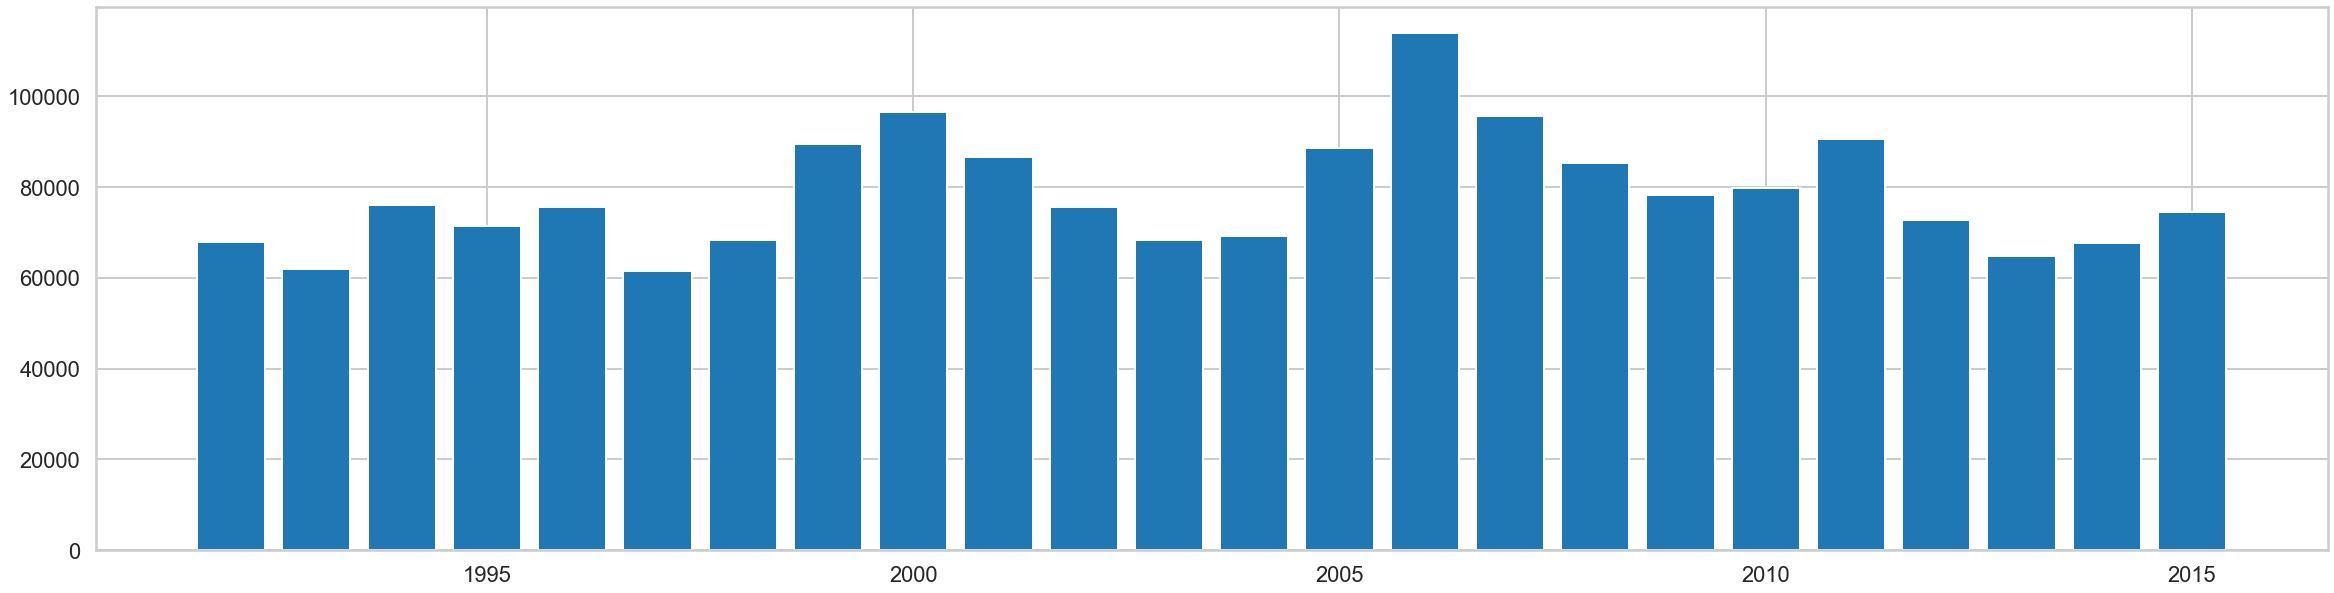

In [69]:
by_year = df.groupby('FIRE_YEAR')['OBJECTID'].count().sort_values()
X = by_year.index
Y = by_year.values
plt.bar(X, Y)
plt.show()

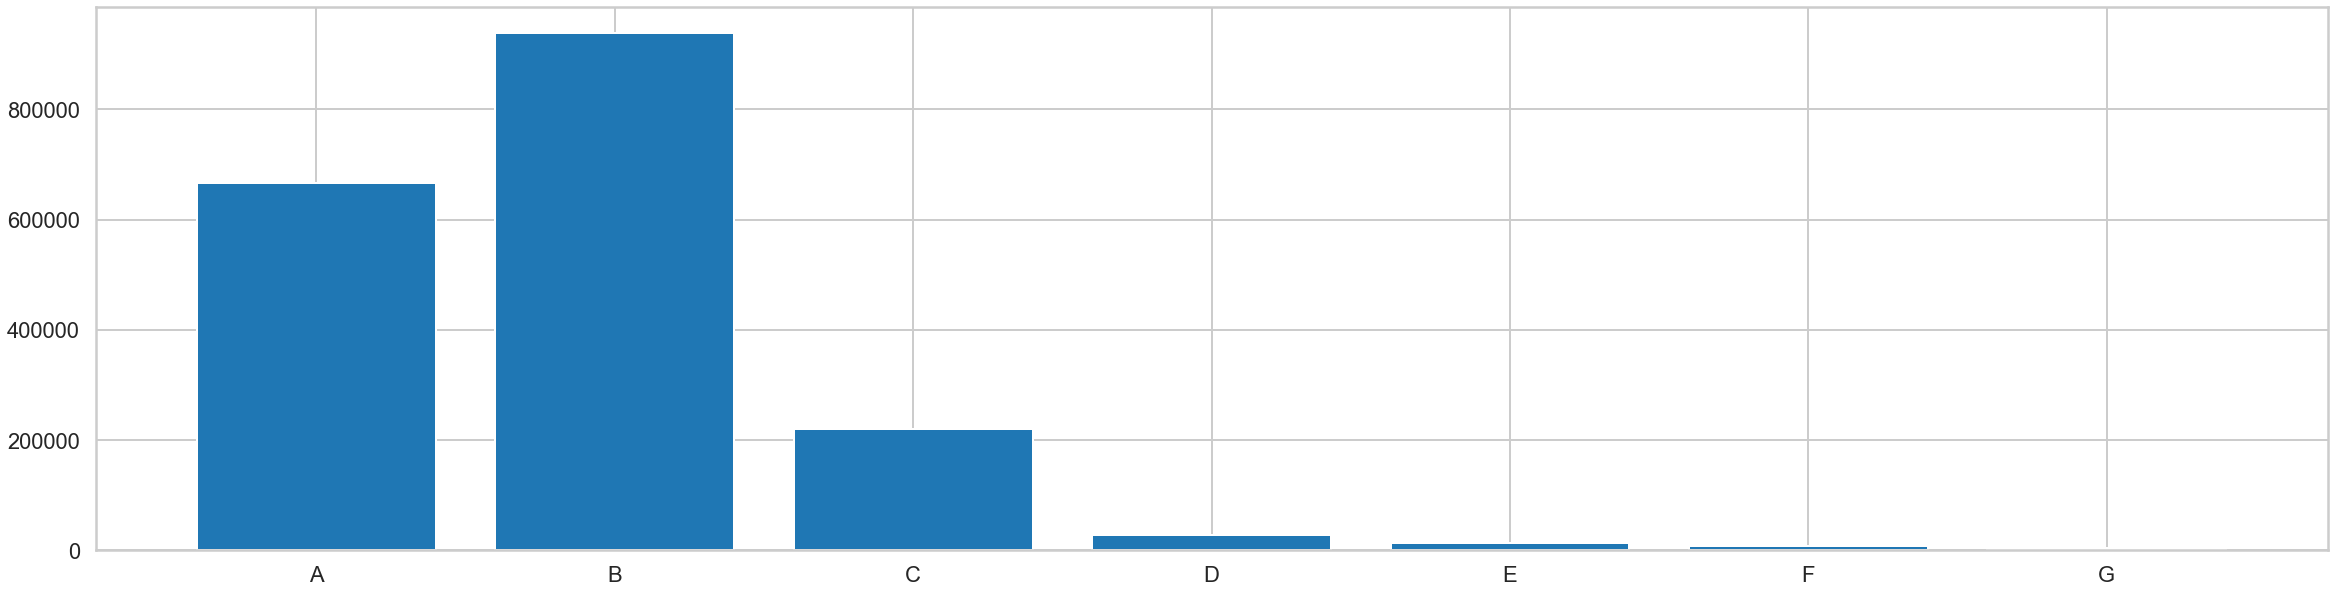

In [70]:
by_size = df.groupby('FIRE_SIZE_CLASS')['OBJECTID'].count()
X = by_size.index
Y = by_size.values
plt.bar(X, Y)
plt.show()

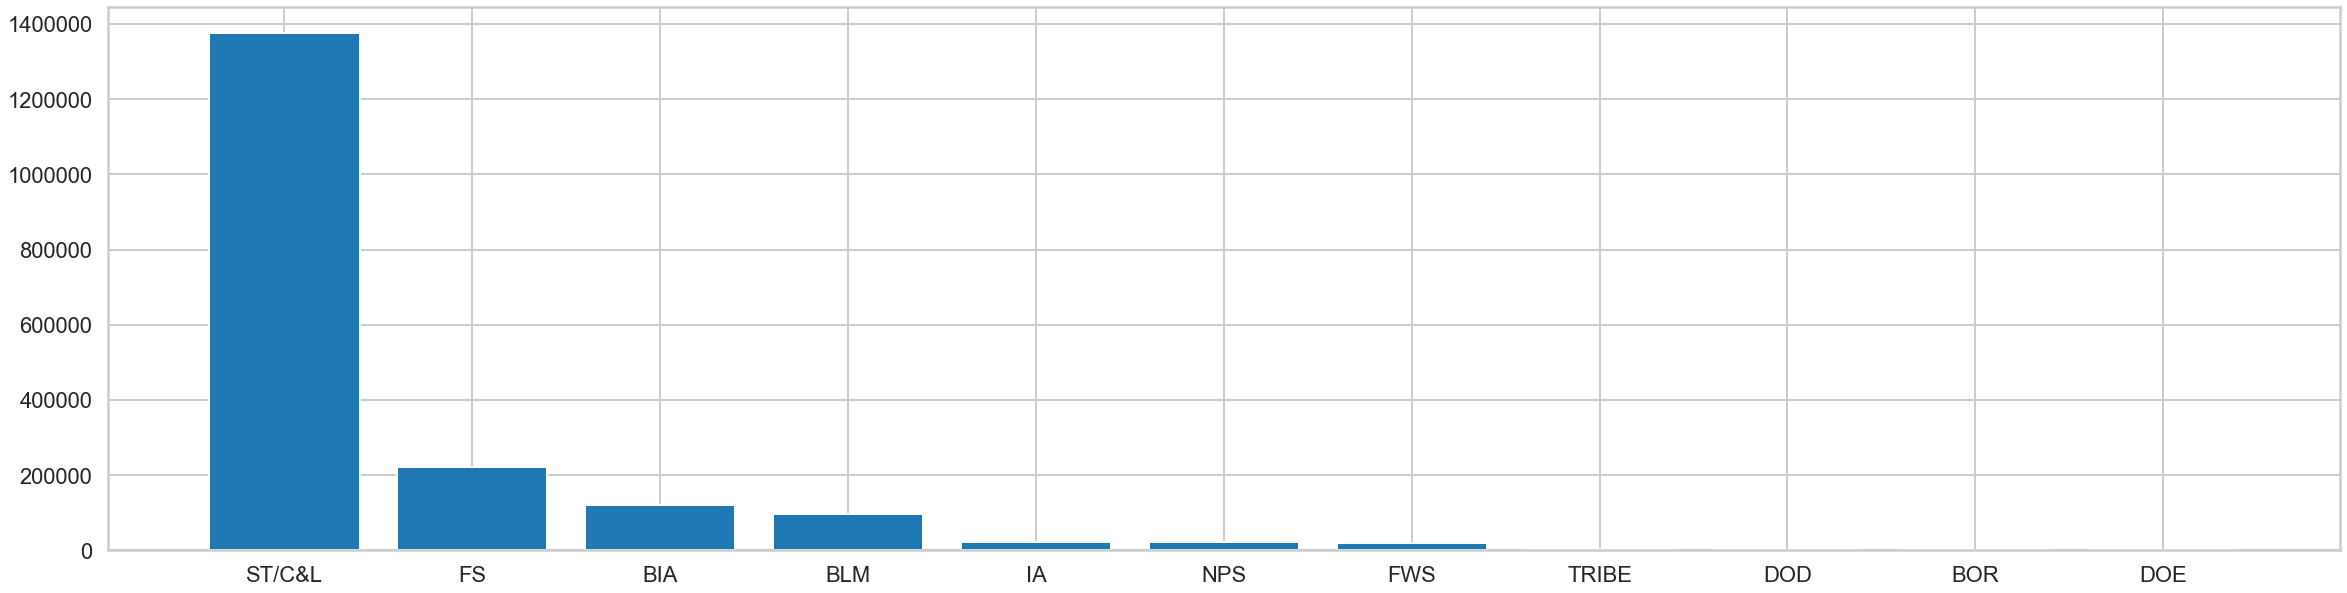

In [71]:
by_agency = df.groupby('NWCG_REPORTING_AGENCY')['OBJECTID'].count().sort_values(ascending=False)
X = by_agency.index
Y = by_agency.values
plt.bar(X, Y)
plt.show()

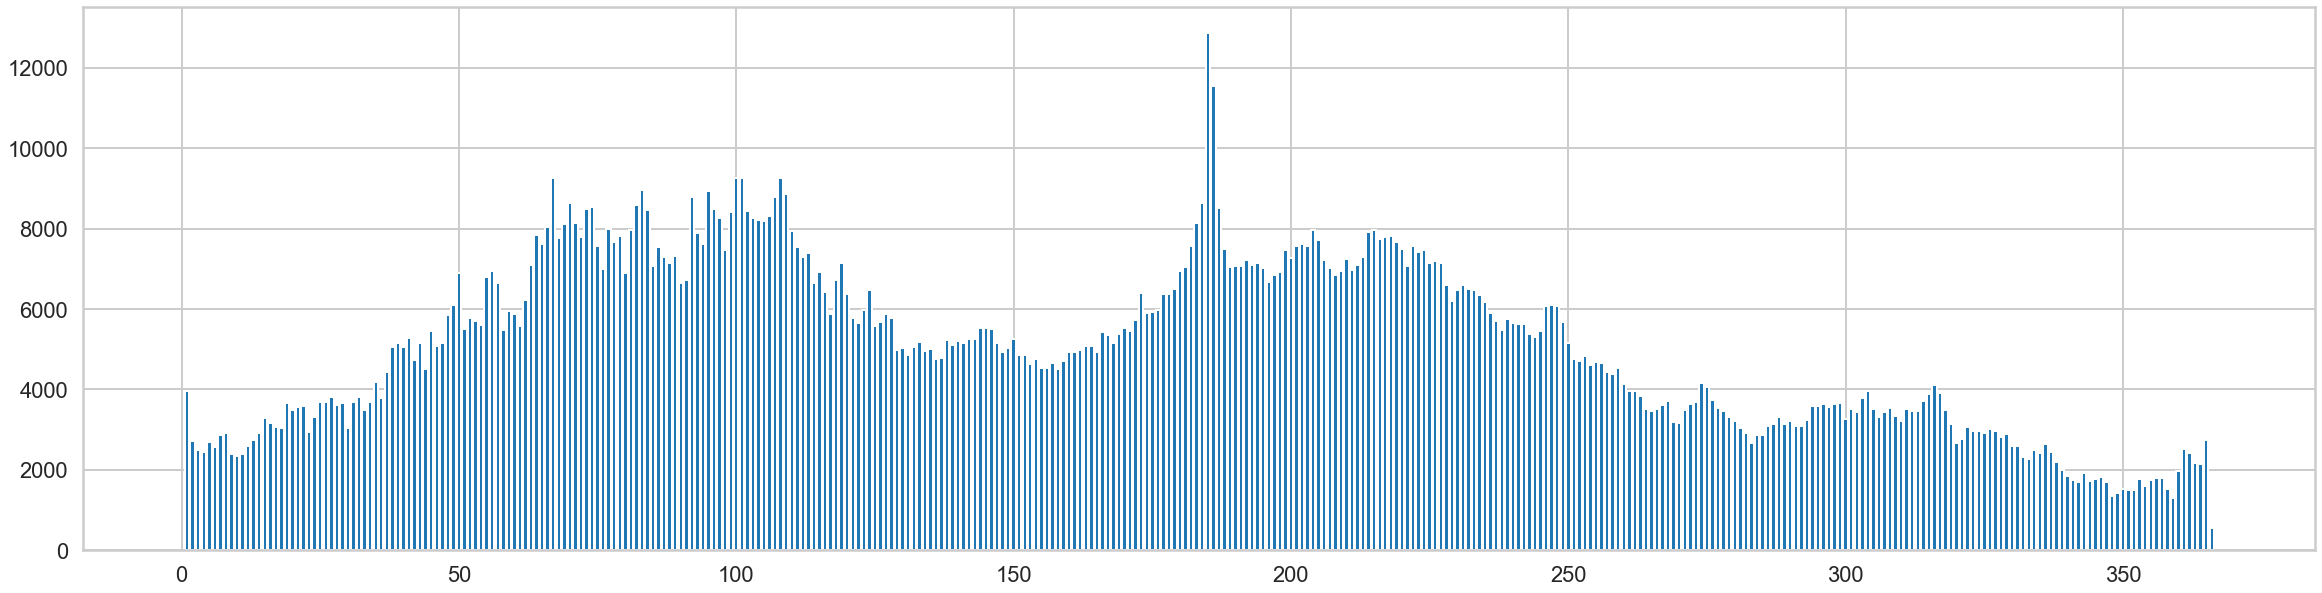

In [72]:
by_agency = df.groupby('DISCOVERY_DOY')['OBJECTID'].count().sort_values(ascending=False)
X = by_agency.index
Y = by_agency.values
plt.bar(X, Y)
plt.show()

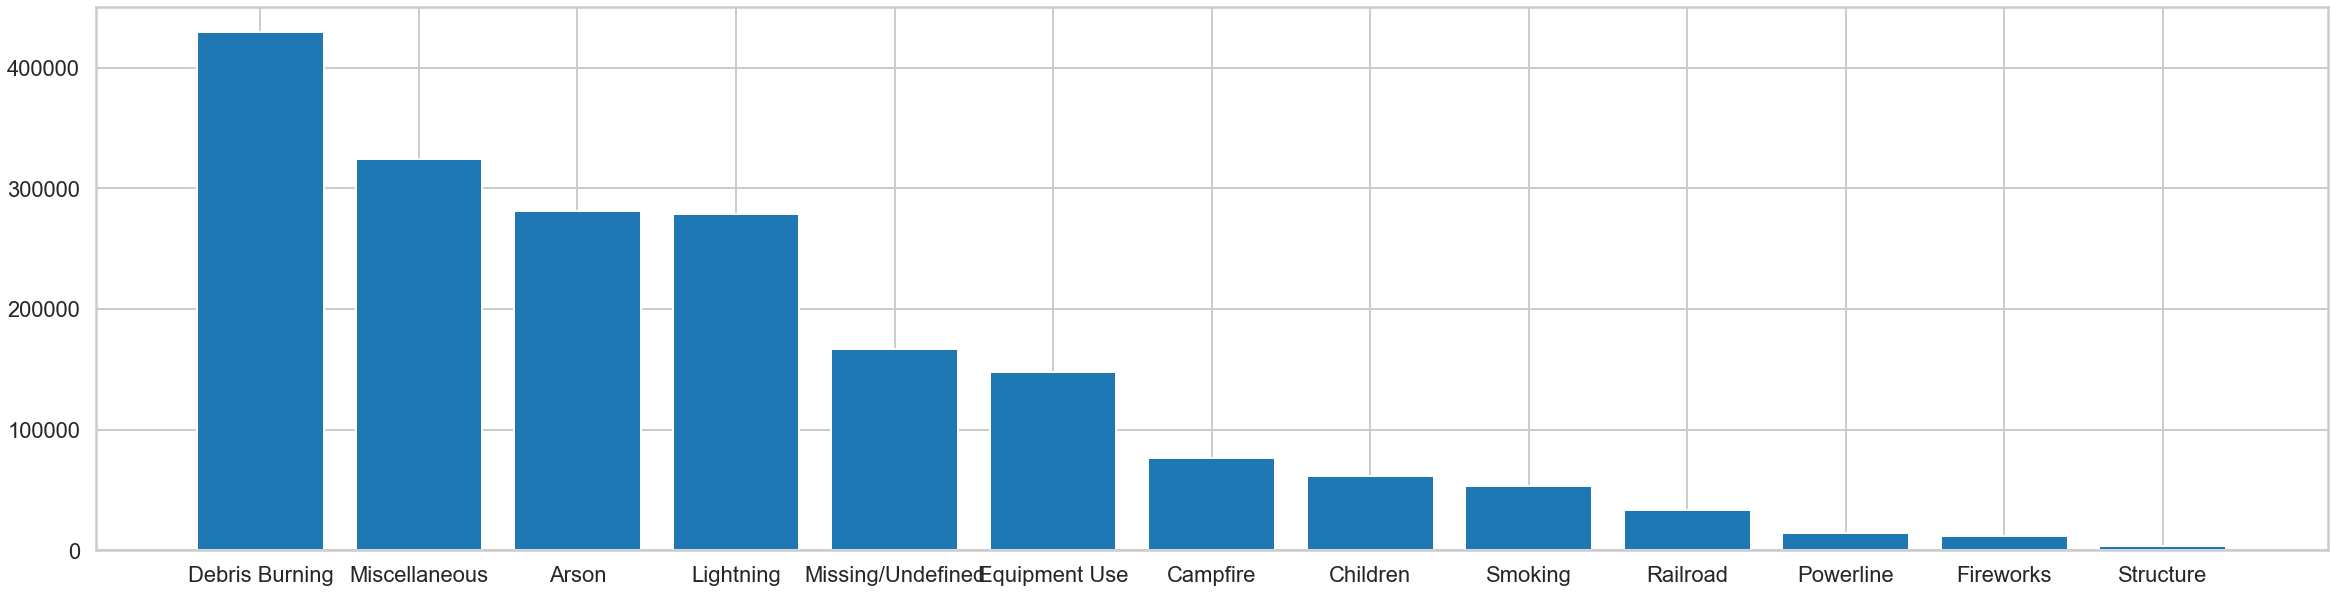

In [73]:
by_cause = df.groupby('STAT_CAUSE_DESCR')['OBJECTID'].count().sort_values(ascending=False)
X = by_cause.index
Y = by_cause.values
plt.bar(X, Y)
plt.show()

In [74]:
plt.rcParams['figure.figsize'] = [40, 30]

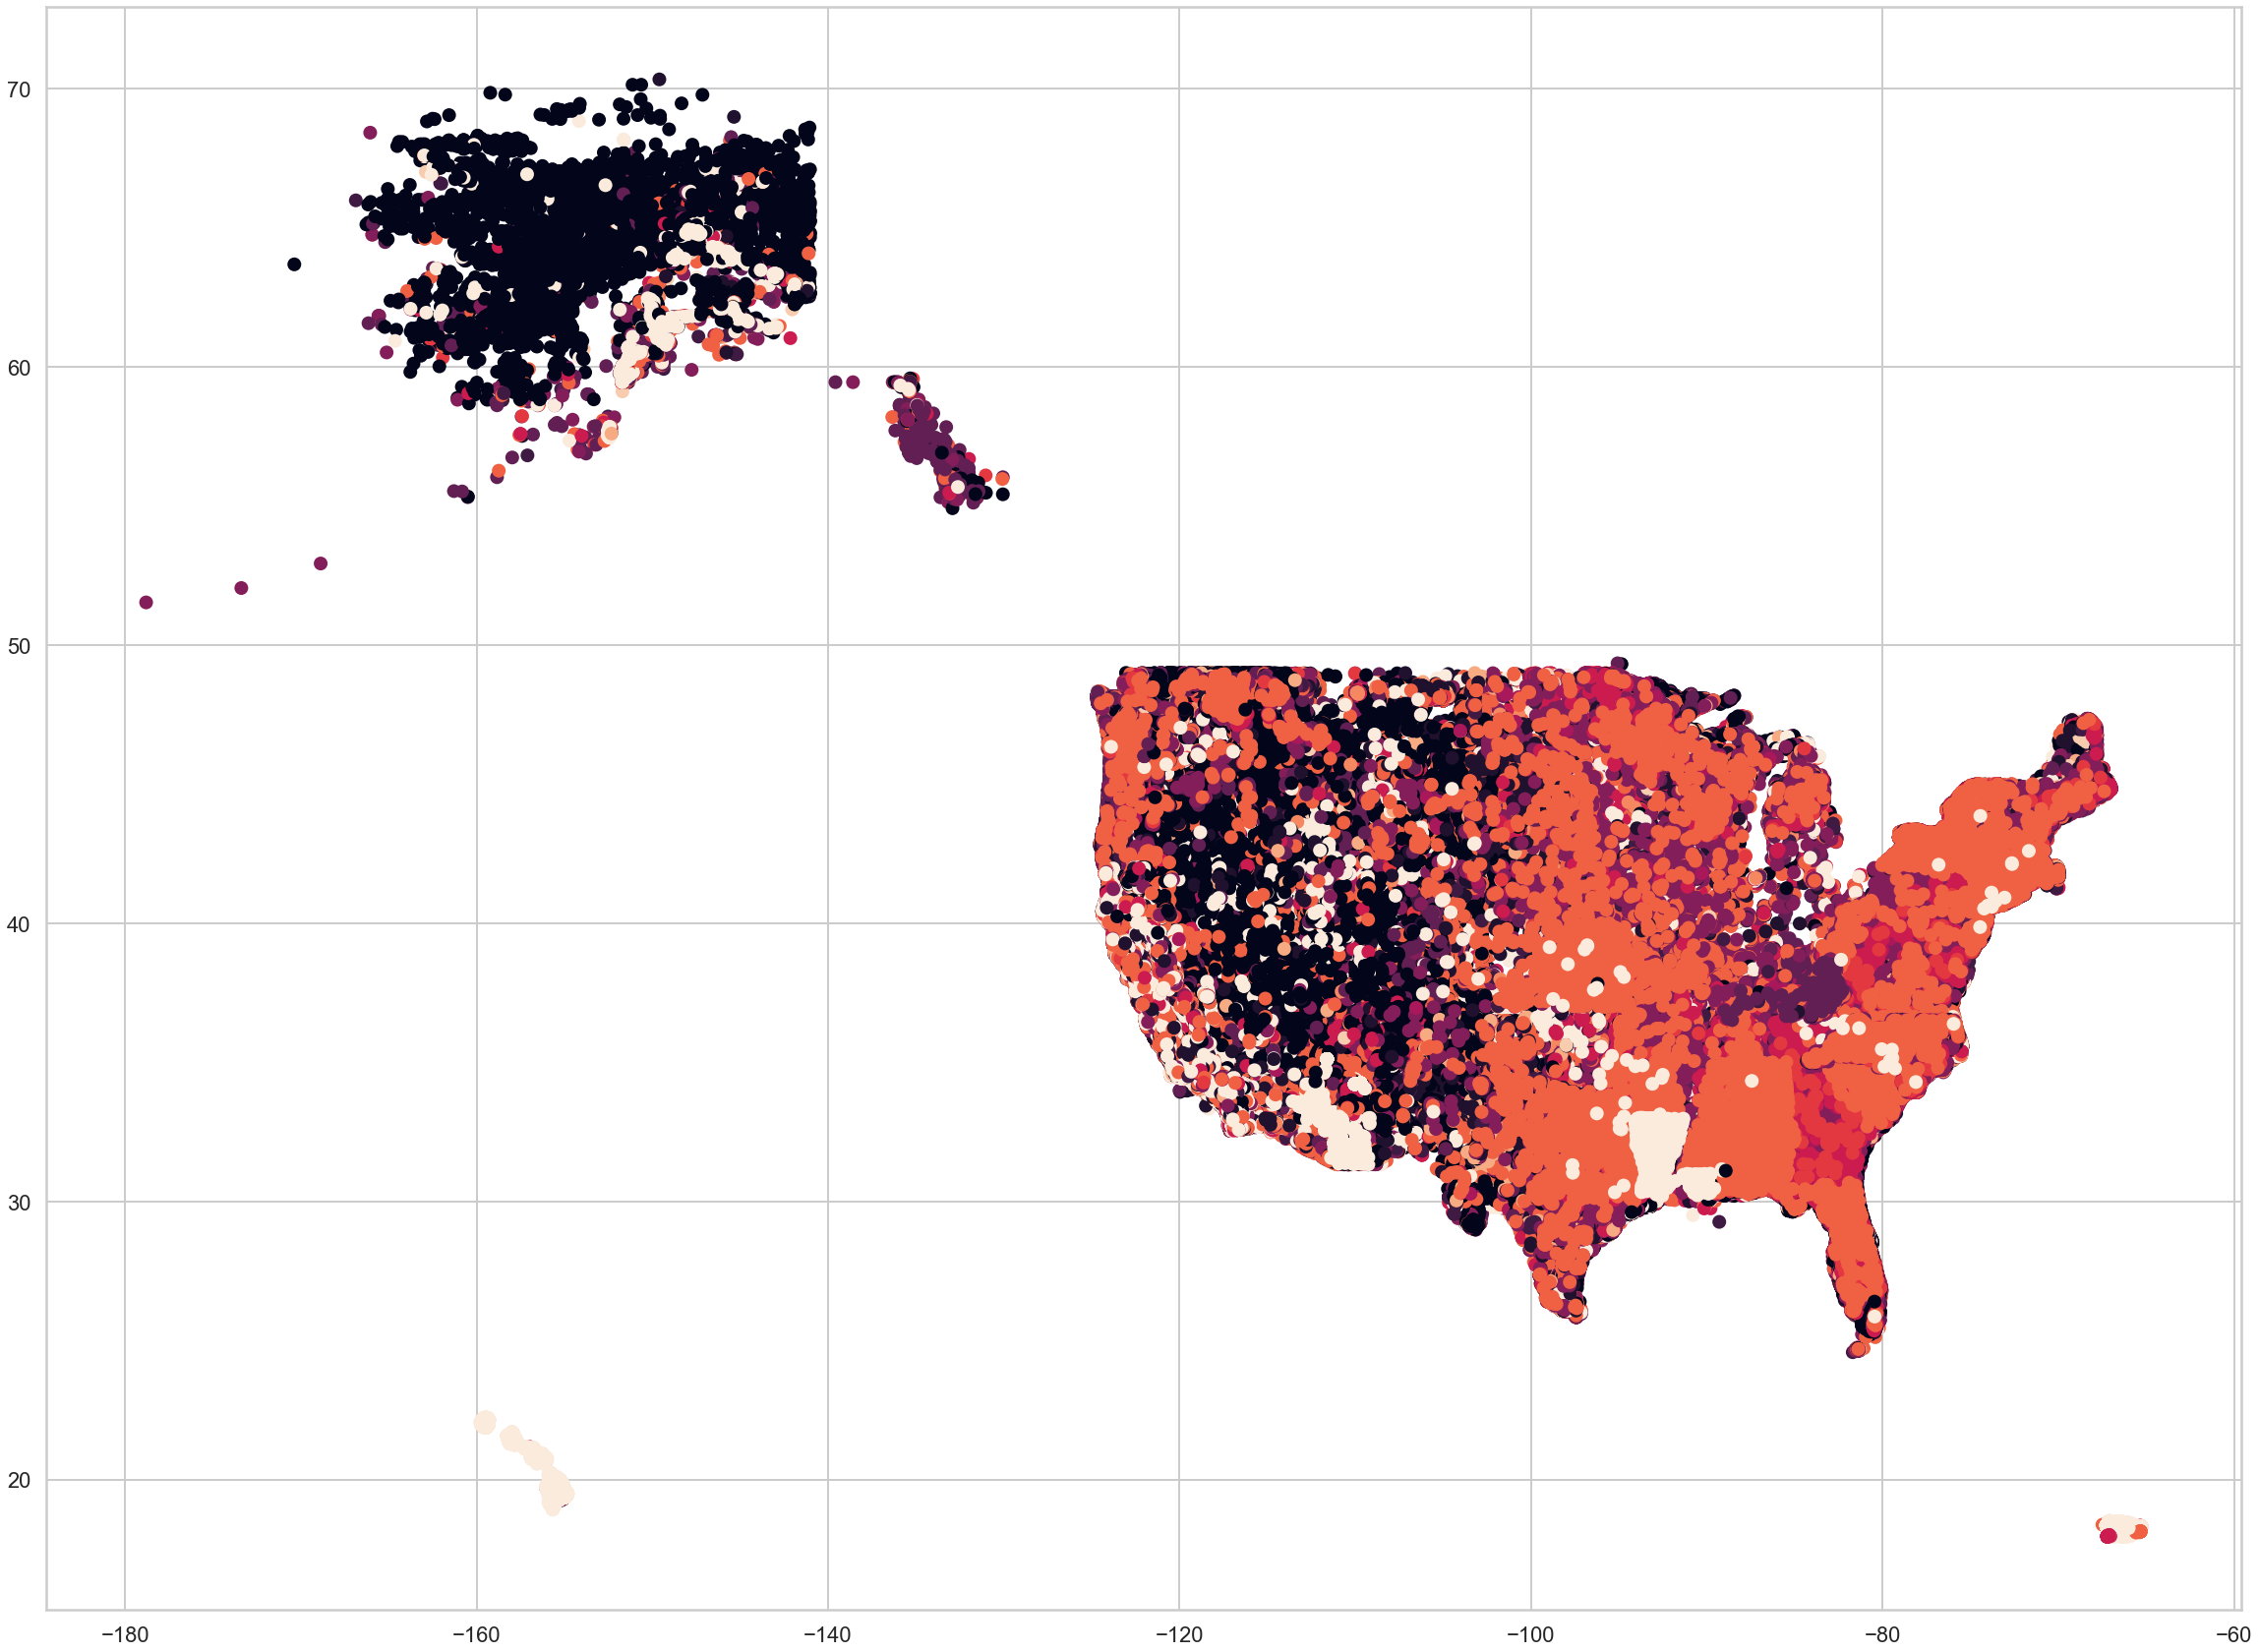

In [75]:
X = df['LONGITUDE']
Y = df['LATITUDE']
C = df['STAT_CAUSE_CODE']
plt.scatter(X, Y, c=C)
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df[['SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
    'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'FIRE_SIZE_CLASS',
    'OWNER_DESCR', 'STATE']] = df[['SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
    'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'FIRE_SIZE_CLASS',
    'OWNER_DESCR', 'STATE']].astype('category')
df_features = df.drop(['STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR'], axis=1)
df_class = df.STAT_CAUSE_CODE

In [102]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 18 columns):
OBJECTID                      int64
SOURCE_SYSTEM_TYPE            category
SOURCE_SYSTEM                 category
NWCG_REPORTING_AGENCY         category
NWCG_REPORTING_UNIT_ID        category
NWCG_REPORTING_UNIT_NAME      category
SOURCE_REPORTING_UNIT         category
SOURCE_REPORTING_UNIT_NAME    category
FIRE_YEAR                     int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                 int64
FIRE_SIZE                     float64
FIRE_SIZE_CLASS               category
LATITUDE                      float64
LONGITUDE                     float64
OWNER_CODE                    float64
OWNER_DESCR                   category
STATE                         category
dtypes: category(10), float64(5), int64(3)
memory usage: 140.5 MB


In [113]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_features, df_class, random_state=41)

clf = LogisticRegression(solver='liblinear')
# Fit the model on the training data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
#print(accuracy_score(clf.predict(Xtestlr), ytestlr))

ValueError: could not convert string to float: 'HI'